## MODELISATION

In [1]:
import pandas as pd

In [88]:
df = pd.read_csv('data_CO2_nettoyee.csv', index_col='ID')

## Normalisation des données

In [82]:
df.columns

Index(['m', 'Mt', 'CO2', 'W', 'At1', 'At2', 'ec', 'ep', 'z',
       'Fuel_consumption', 'Electric_range', 'Cr_M1G', 'Ft_DIESEL/ELECTRIC',
       'Ft_E85', 'Ft_LPG', 'Ft_NG', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC', 'Fm_F',
       'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
## Suppression de la colonne m car identique à Mt
df.drop('m', axis=1, inplace=True)

In [90]:
## Normalisation des données avec un MinMaxScaler de toutes les variables sauf la variable CO2
scaler = MinMaxScaler()
df[['Mt', 'W', 'At1', 'At2', 'ec', 'ep', 'z',
        'Electric_range', 'Cr_M1G', 'Ft_DIESEL/ELECTRIC',
       'Ft_E85', 'Ft_LPG', 'Ft_NG', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC', 'Fm_F',
       'Fm_H', 'Fm_M', 'Fm_P']]=scaler.fit_transform(df[['Mt', 'W', 'At1', 'At2', 'ec', 'ep', 'z', 'Electric_range', 'Cr_M1G', 'Ft_DIESEL/ELECTRIC',
       'Ft_E85', 'Ft_LPG', 'Ft_NG', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC', 'Fm_F',
       'Fm_H', 'Fm_M', 'Fm_P']])

In [69]:
df.head()

,Mt,CO2,W,At1,At2,ec,ep,z,Fuel_consumption,Electric_range,...,Ft_DIESEL/ELECTRIC,Ft_E85,Ft_LPG,Ft_NG,Ft_PETROL,Ft_PETROL/ELECTRIC,Fm_F,Fm_H,Fm_M,Fm_P
ID,,,,,,,,,,,,,,,,,,,,,
77798939,0.501973,30,0.471471,0.683453,0.665208,0.128153,0.083097,0.458213,0.032389,0.460938,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77798940,0.497238,29,0.471471,0.683453,0.665208,0.128153,0.083097,0.458213,0.032389,0.468750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77798941,0.501184,30,0.471471,0.683453,0.665208,0.128153,0.083097,0.458213,0.032389,0.460938,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77798942,0.504736,30,0.471471,0.683453,0.665208,0.128153,0.083097,0.458213,0.032389,0.460938,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77798943,0.496448,29,0.471471,0.683453,0.665208,0.128153,0.083097,0.458213,0.032389,0.468750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Analyse de corrélation

In [22]:
df.corr()

,Mt,CO2,W,At1,At2,ec,ep,z,Fuel_consumption,Electric_range,...,Ft_DIESEL/ELECTRIC,Ft_E85,Ft_LPG,Ft_NG,Ft_PETROL,Ft_PETROL/ELECTRIC,Fm_F,Fm_H,Fm_M,Fm_P
Mt,1.000000,-0.280253,0.791119,0.853280,0.844641,0.654660,0.632071,0.646640,-0.332391,0.585177,...,0.281910,0.008495,-0.056849,-0.019931,-0.568368,0.507560,-0.053329,0.077766,-0.537120,0.583231
CO2,-0.280253,1.000000,-0.056815,-0.124958,-0.143902,0.165627,0.096227,-0.847895,0.979984,-0.875494,...,-0.225992,0.097382,-0.005387,-0.007152,0.395542,-0.834217,0.001858,0.248687,0.531268,-0.880726
W,0.791119,-0.056815,1.000000,0.750582,0.749778,0.502146,0.431594,0.333893,-0.122358,0.289557,...,0.170092,-0.046472,-0.019519,-0.016085,-0.438503,0.232247,-0.057765,0.128406,-0.329646,0.280354
At1,0.853280,-0.124958,0.750582,1.000000,0.956850,0.538758,0.559521,0.466798,-0.166479,0.411582,...,0.184773,0.040578,-0.045140,-0.027714,-0.437873,0.359295,-0.048139,0.079911,-0.394894,0.408010
At2,0.844641,-0.143902,0.749778,0.956850,1.000000,0.528140,0.521616,0.465648,-0.186960,0.411335,...,0.227743,0.014365,-0.041341,-0.028863,-0.432648,0.339394,-0.070203,0.105080,-0.409429,0.402865
ec,0.654660,0.165627,0.502146,0.538758,0.528140,1.000000,0.811784,0.176310,0.108203,0.121152,...,0.055163,0.008128,-0.067780,-0.020573,-0.367143,0.107076,-0.059372,0.198344,-0.249427,0.121626
ep,0.632071,0.096227,0.431594,0.559521,0.521616,0.811784,1.000000,0.313813,0.100227,0.261028,...,0.043025,-0.018170,-0.046284,-0.018302,-0.150366,0.259042,-0.038425,0.111595,-0.302030,0.264578
z,0.646640,-0.847895,0.333893,0.466798,0.465648,0.176310,0.313813,1.000000,-0.826295,0.945458,...,0.362009,-0.060189,-0.024029,-0.009959,-0.437937,0.882985,-0.020917,-0.249055,-0.602746,0.972498
Fuel_consumption,-0.332391,0.979984,-0.122358,-0.166479,-0.186960,0.108203,0.100227,-0.826295,1.000000,-0.853926,...,-0.233241,0.131526,0.052116,0.006723,0.534591,-0.807719,0.008021,0.233223,0.518365,-0.857484
Electric_range,0.585177,-0.875494,0.289557,0.411582,0.411335,0.121152,0.261028,0.945458,-0.853926,1.000000,...,0.254677,-0.059472,-0.023743,-0.009840,-0.432720,0.907419,-0.020668,-0.246088,-0.595566,0.960915


In [91]:
## Suppression des variables très corrélées entre elles
df = df.drop(['At2','Electric_range','z','ec','Fuel_consumption'],axis=1)

In [92]:
## Suppression des valeurs dupliquées
df.duplicated().sum()
df.drop_duplicates(inplace=True)
## Renommer des variables
df = df.rename(columns={'Ft_DIESEL/ELECTRIC':'Ft_D_E', 'Ft_PETROL/ELECTRIC':'Ft_P_E'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82284 entries, 77798939 to 77955102
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mt         82284 non-null  float64
 1   Ewltp      82284 non-null  int64  
 2   W          82284 non-null  float64
 3   At1        82284 non-null  float64
 4   ep         82284 non-null  float64
 5   Cr_M1G     82284 non-null  float64
 6   Ft_D_E     82284 non-null  float64
 7   Ft_E85     82284 non-null  float64
 8   Ft_LPG     82284 non-null  float64
 9   Ft_NG      82284 non-null  float64
 10  Ft_PETROL  82284 non-null  float64
 11  Ft_P_E     82284 non-null  float64
 12  Fm_F       82284 non-null  float64
 13  Fm_H       82284 non-null  float64
 14  Fm_M       82284 non-null  float64
 15  Fm_P       82284 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 10.7 MB


In [25]:
import numpy as np
import seaborn as sns
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.feature_selection import SelectFromModel
import scipy.stats as stats
from sklearn.metrics import mean_squared_error


In [93]:
#Séparation des données 
target = df['CO2']
data = df.drop(['CO2'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### Regression linéaire

In [45]:
#Instancier un régresseur et ajuster le modèle à l'ensemble d'entraînement
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
#Calcul du score (R²) sur l'échantillion d'apprentissage et l'ensemble de test 
print(lr.score(X_train, y_train)*100)
print(lr.score(X_test,y_test)*100)
#Calcul du score par validation croisée
print(cross_val_score(lr,X_train,y_train).mean()*100)
print(cross_val_score(lr,X_test,y_test).mean()*100)

91.13352224627376
91.19553371413227
91.12662462217334
91.1773712823468


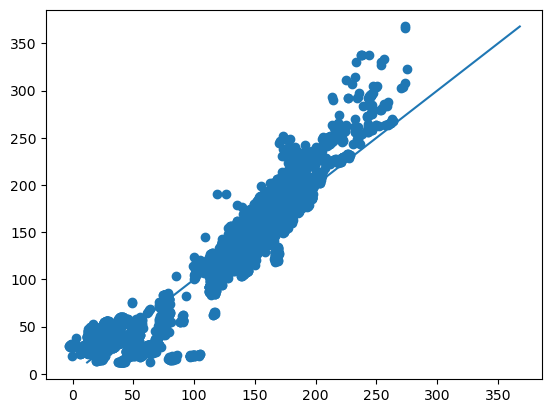

In [23]:
#Prédiction du modèle pour X_test
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

In [24]:
## Comparer les valeurs réelles aux valeurs prédites
predit=pred_test
reelle=y_test
pd.DataFrame({'réelle':reelle, 'predit':predit})

,réelle,predit
ID,,
78137766,160,156.250000
77967639,119,137.156250
77967355,147,153.453125
77930442,40,48.625000
78217544,145,144.953125
...,...,...
77874827,35,35.281250
77172815,134,131.609375
78209779,30,65.171875


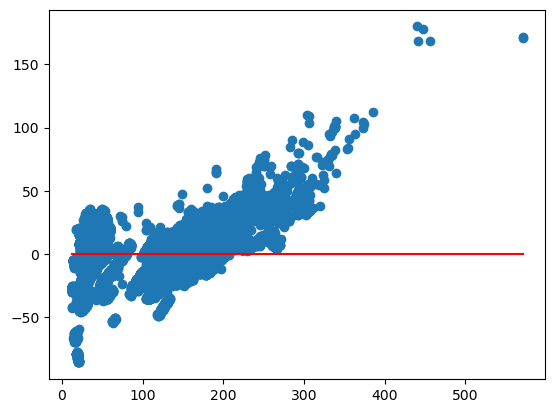

In [25]:
#Homoscédasticité des résidus
#Calcul des résidus
pred_train = lr.predict(X_train)
residus = y_train-pred_train

plt.scatter(y_train, residus)
plt.plot((y_train.min(),y_train.max()),(0,0), color='red');


In [26]:
#calcul des racines des erreurs quadratiques moyennes pour les deux échantillons
print(np.sqrt(mean_squared_error(pred_train, y_train)))
print(np.sqrt(mean_squared_error(pred_test, y_test)))

14.187175049490374
14.145087699212292


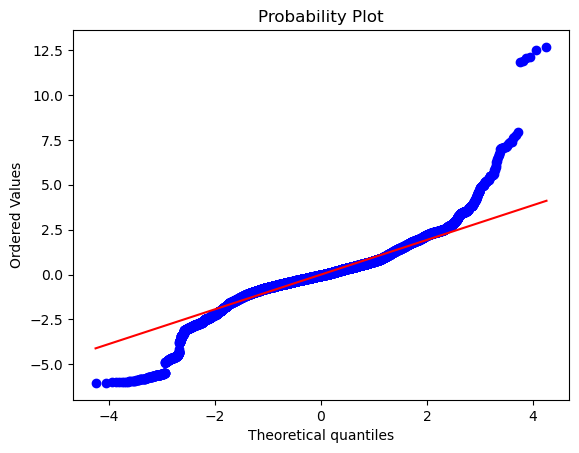

In [27]:
#Distribution des résidus
residus_norm = (residus-residus.mean())/residus.std()
stats.probplot(residus_norm, plot=plt)
plt.show()

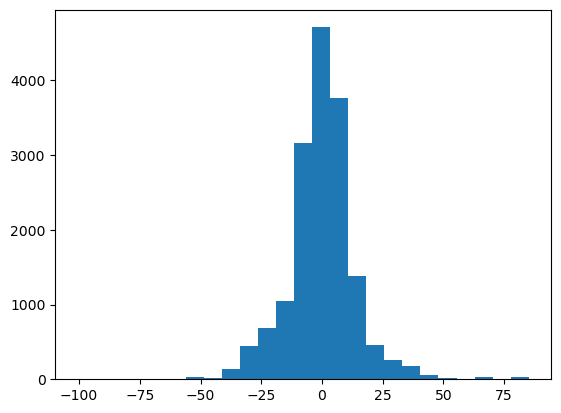

In [33]:
## Distribution de la différence entre les valeurs réelles et les valeurs prédites
error_r=predit - reelle
plt.hist(error_r,bins=25);

In [40]:
## Afficher les coefficients
pd.DataFrame(abs(lr.coef_), X_train.columns).rename(columns={0:'coeff'}).sort_values('coeff', ascending=False)

,coeff
Ft_LPG,7.069740e+10
Fm_M,7.069740e+10
Fm_H,7.069740e+10
Fm_F,7.069740e+10
Ft_P_E,4.067996e+10
Ft_D_E,4.067996e+10
Fm_P,3.001744e+10
ep,4.214718e-01
Mt,2.121180e-01
Ft_E85,5.721351e-02


## Régression Ridge

In [47]:
## Instancier un régresseur
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas = (0.1,1,10,100))
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. , 100. ]))

In [48]:
## Le meilleur alpha
ridge_reg.alpha_

0.1

In [49]:
## Calcul du score
print(ridge_reg.score(X_train,y_train))
print(ridge_reg.score(X_test,y_test))

0.9113353018116563
0.9119569574276858


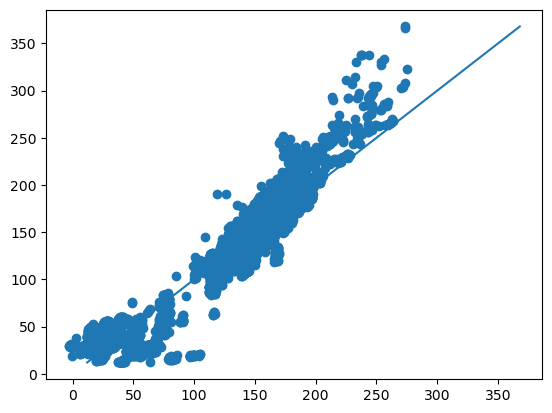

In [17]:
### Analyse des valeurs prédites par rapport aux valeurs réelles
pred_test_r = ridge_reg.predict(X_test)
plt.scatter(pred_test_r, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

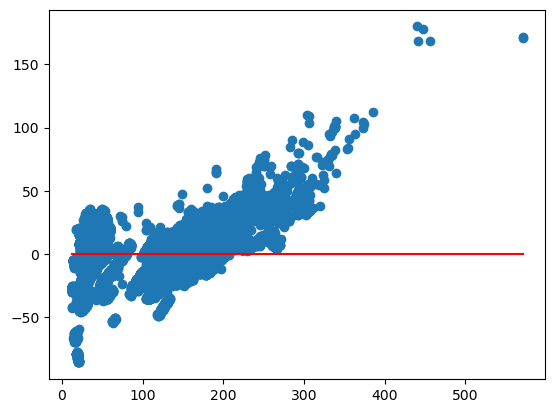

In [18]:
# Analyser les résidus
pred_train_r = lr.predict(X_train)
residus = y_train-pred_train_r

plt.scatter(y_train, residus)
plt.plot((y_train.min(),y_train.max()),(0,0), color='red');

In [20]:
## Calcul du score par validation croisée
print(cross_val_score(ridge_reg,X_train,y_train).mean()*100)
print(cross_val_score(ridge_reg,X_test,y_test).mean()*100)

91.12659146285213
91.17739409600564


## Régression Lasso

In [95]:
## Appliquer Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print("score sur les valeurs d'entrainement : ", lasso.score(X_train, y_train))
print("score sur les valeurs test : ", lasso.score(X_test, y_test))


score sur les valeurs d'entrainement :  0.9072158654197948
score sur les valeurs test :  0.9084168601255226


In [90]:
## Prédire les valeurs
pred_train_lasso = lasso_reg.predict(X_train)
pred_test_lasso = lasso_reg.predict(X_test)

In [91]:
#calcul des racines des erreurs quadratiques moyennes pour les deux échantillons
print(np.sqrt(mean_squared_error(pred_train_lasso, y_train)))
print(np.sqrt(mean_squared_error(pred_test_lasso, y_test)))

14.513051976711932
14.426592717700185


## Elastic Net

In [97]:
from sklearn.linear_model import ElasticNetCV
model_en = ElasticNetCV(l1_ratio=(0.1,1,10,100), alphas=(0.1,0.4,0.5,0.7,1))
model_en.fit(X_train, y_train)

C:\Users\lyamo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349811.6445559561, tolerance: 11970.748506758322
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lyamo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2706017.4377496243, tolerance: 11970.748506758322
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lyamo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3841910.2996515036, tolerance: 11970.748506758322
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lyamo\anaconda3\envs\tensorflow

ElasticNetCV(alphas=(0.1, 0.4, 0.5, 0.7, 1), l1_ratio=(0.1, 1, 10, 100))

In [98]:
#Calcul du score (R²) sur l'échantillion d'apprentissage et l'ensemble de test 
print(model_en.score(X_train, y_train)*100)
print(model_en.score(X_test,y_test)*100)

90.72158654197949
90.84168601255226


In [99]:
modelen_pred_train = model_en.predict(X_train)
modelen_pred_test = model_en.predict(X_test)

print(np.sqrt(mean_squared_error(modelen_pred_train, y_train)))
print(np.sqrt(mean_squared_error(modelen_pred_test, y_test)))

14.513051976711932
14.426592717700185


## Bagging/Boosting


In [100]:
## Bagging
from sklearn.ensemble import BaggingRegressor
bc = BaggingRegressor(base_estimator=lr, n_estimators=100)

bc.fit(X_train, y_train)

## Calcul du score
print(bc.score(X_train, y_train))
print(bc.score(X_test, y_test))

C:\Users\lyamo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.911334641821049
0.9119606030836321


In [101]:
## Boosting
from sklearn.ensemble import AdaBoostRegressor

ac = AdaBoostRegressor(base_estimator=lr, n_estimators=100)

ac.fit(X_train, y_train)
## Calcul du score
print(ac.score(X_train, y_train))
print(ac.score(X_test, y_test))

C:\Users\lyamo\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8889139419876139
0.8874363295584208


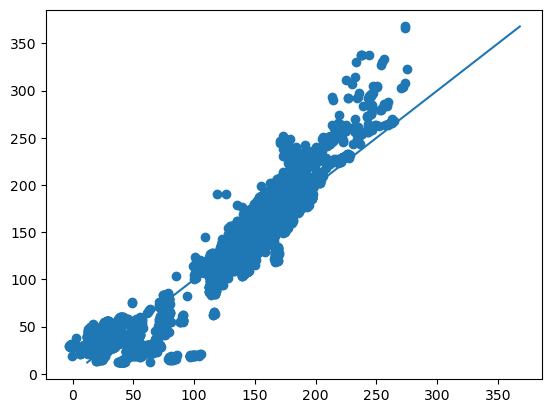

In [102]:
#Prédiction du modèle pour X_test
pred_test_bc = bc.predict(X_test)
plt.scatter(pred_test_bc, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

In [103]:
pred_test_bc = bc.predict(X_test)
pred_train_bc = bc.predict(X_train)
#calcul des racines des erreurs quadratiques moyennes pour les deux échantillons
print(np.sqrt(mean_squared_error(pred_train_bc, y_train)))
print(np.sqrt(mean_squared_error(pred_test_bc, y_test)))

14.187271386480363
14.144725906463632


## Deep Learning

In [104]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [106]:
input_shape = (X_train.shape[1],)
print(input_shape)

(15,)


In [152]:
model = Sequential()
model.add(Dense(units=10, input_shape=input_shape, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [108]:
early_stopping = callbacks.EarlyStopping(monitor = 'val_loss',patience = 20,mode = 'min',restore_best_weights = True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience=5,factor=0.8, verbose=1,mode='min')

In [153]:
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 30, validation_split = 0.2) #callbacks = [early_stopping,lr_plateau]) 

Epoch 1/100
1756/1756 [==============================] - 10s 5ms/step - loss: 17.5128 - mse: 1234.5804 - mae: 17.5128 - val_loss: 8.0288 - val_mse: 129.3302 - val_mae: 8.0288
Epoch 2/100
1756/1756 [==============================] - 9s 5ms/step - loss: 8.1383 - mse: 130.0255 - mae: 8.1383 - val_loss: 7.6643 - val_mse: 114.0906 - val_mae: 7.6643
Epoch 3/100
1756/1756 [==============================] - 8s 5ms/step - loss: 7.8455 - mse: 120.1214 - mae: 7.8455 - val_loss: 7.5962 - val_mse: 111.4875 - val_mae: 7.5962
Epoch 4/100
1756/1756 [==============================] - 8s 5ms/step - loss: 7.6793 - mse: 116.7692 - mae: 7.6793 - val_loss: 7.6426 - val_mse: 108.9669 - val_mae: 7.6426
Epoch 5/100
1756/1756 [==============================] - 8s 5ms/step - loss: 7.5896 - mse: 115.0368 - mae: 7.5896 - val_loss: 7.2857 - val_mse: 106.5971 - val_mae: 7.2857
Epoch 6/100
1756/1756 [==============================] - 9s 5ms/step - loss: 7.5000 - mse: 114.0402 - mae: 7.5000 - val_loss: 7.5379 - val_ms

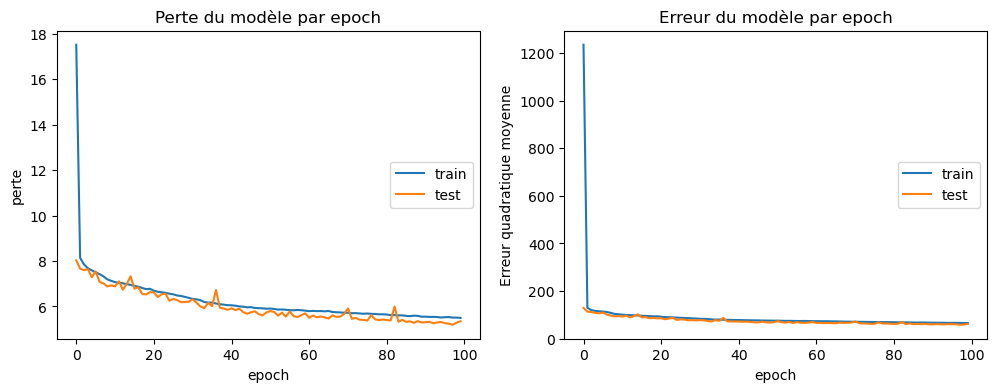

In [155]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle par epoch')
plt.ylabel('perte')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Erreur du modèle par epoch')
plt.ylabel('Erreur quadratique moyenne')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right');

In [156]:
y_pred_dnn = model.predict(X_test)

515/515 [==============================] - 2s 3ms/step


In [157]:
y_pred_dnn

array([[152.86314 ],
       [127.650024],
       [147.5429  ],
       ...,
       [ 32.6965  ],
       [138.07536 ],
       [133.04176 ]], dtype=float32)

In [158]:
from sklearn.metrics import r2_score
print("r2_score du modèle lr : {}".format(r2_score(y_test, pred_test)))
print("r2_score du modèle dnn : {}".format(r2_score(y_test, y_pred_dnn)))

r2_score du modèle lr : 0.9119560992957234
r2_score du modèle dnn : 0.9710440051294922


In [159]:
## Comparaison des valeurs réelles aux valeurs prédites avec une régression linéaire et avec un modèle de deeplearning
result = pd.DataFrame()
result['y_test'] = [y_test.values[i] for i in range(len(y_test))] 
result['pred_test'] = [pred_test[j] for j in range(len(pred_test))]
result['y_pred_dnn'] = [y_pred_dnn[i][0] for i in range(len(y_pred_dnn))]
result.head(10)
pred_test=np.array(pred_test)
result

,y_test,pred_test,y_pred_dnn
0,160,156.250000,152.863144
1,119,137.156250,127.650024
2,147,153.453125,147.542892
3,40,48.625000,42.885456
4,145,144.953125,138.566162
...,...,...,...
16452,35,35.281250,37.794231
16453,134,131.609375,129.205460
16454,30,65.171875,32.696499
16455,143,143.265625,138.075363


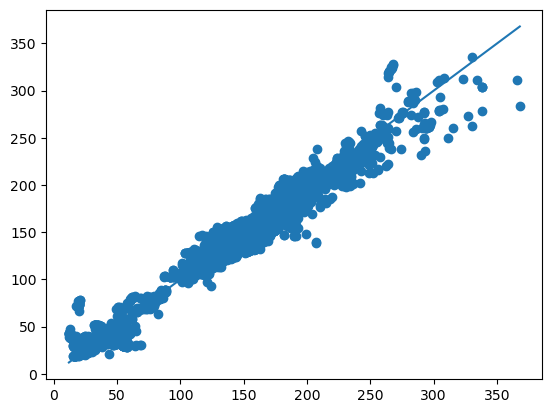

In [165]:
## Analyse des valeurs prédites aux valeurs réelles
plt.scatter(result['y_test'],result['y_pred_dnn'])
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

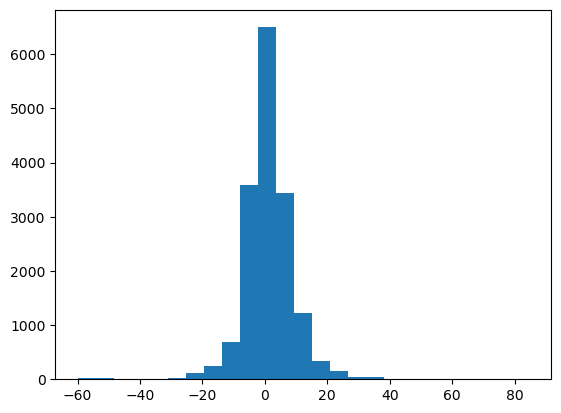

In [182]:
## Distribution des erreurs
error=result['y_test'] - result['y_pred_dnn']
plt.hist(error,bins=25);

In [218]:
result_train = pd.DataFrame()
result_train['y_train'] = [y_train[i] for i in range(len(y_train))] 
result_train['y_pred_train'] = [pred_train_dnn[i][0] for i in range(len(pred_train_dnn))]

In [219]:
result_train

,y_train,y_pred_train
0,175,189.302719
1,139,141.575577
2,163,171.632584
3,123,119.711876
4,158,153.711975
...,...,...
65822,141,143.830536
65823,132,128.467178
65824,148,145.442047
65825,31,29.716377


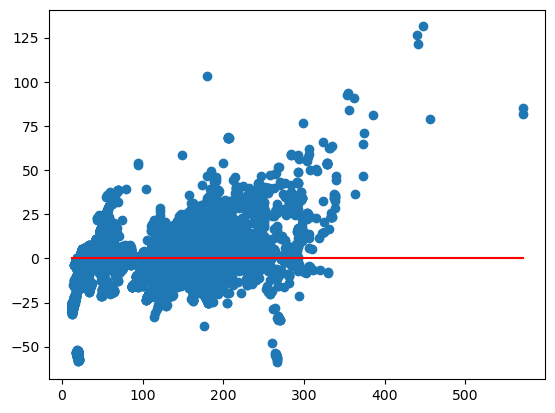

In [221]:
#Calcul des résidus
#pred_train_dnn = model.predict(X_train)
residus_dnn = result_train['y_train']-result_train['y_pred_train']
pred_train_dnn = [pred_train_dnn[i] for i in range(len(pred_train_dnn))] 
plt.scatter(result_train['y_train'], residus_dnn)
plt.plot((y_train.min(),y_train.max()),(0,0), color='red');
